In [0]:
import pandas as pd
import numpy as np

# 数据预处理

In [0]:
data = pd.read_csv("./ner_dataset.csv", encoding="latin1")   

In [3]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [0]:
data = data.fillna(method="ffill")   #用前面的值填充后面的空白

In [5]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [0]:
df1 = pd.DataFrame({ "Sentence #":['Sentence: 47960']*6, 
                    "Word":['my', 'name', 'is', 'abhishek', 'kumar','.'],  
                    "POS":[None]*6,
                    "Tag":['O','O','O','B-per','I-per','O']})
df2 = pd.DataFrame({ "Sentence #":['Sentence: 47961']*7, 
                    "Word":['my', 'name', 'is', 'ritik', 'kumar','gupta','.'],  
                    "POS":[None]*7,
                    "Tag":['O','O','O','B-per','I-per','I-per','O']})

In [0]:
data = data.append(df1)
data = data.append(df2)

In [8]:
data.tail()

,Sentence #,Word,POS,Tag
2,Sentence: 47961,is,None,O
3,Sentence: 47961,ritik,None,B-per
4,Sentence: 47961,kumar,None,I-per
5,Sentence: 47961,gupta,None,I-per
6,Sentence: 47961,.,None,O


In [9]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
n_words = len(words)
n_words

35183

In [10]:
tags = list(set(data["Tag"].values))
n_tags = len(tags)
n_tags

17

In [0]:
class SentenceGetter(object):
    def __init__(self,data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        self.grouped = self.data.groupby("Sentence #").apply(lambda x:[(w,p,t) for w,p,t in zip(x["Word"].values.tolist(),
                                                                                               x["POS"].values.tolist(),
                                                                                               x["Tag"].values.tolist())])
        self.sentences = [s for s in self.grouped]
        
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [0]:
getter = SentenceGetter(data)

In [13]:
sent = getter.get_next()
print(sent)

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [0]:
sentences = getter.sentences    #得到所有的句子

In [15]:
sentences[0]     #每一个句子的每一个单词以元组的形式表示

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [0]:
max_len = 75
word2idx = {w:i for i,w in enumerate(words)}    #词的字典
tag2idx = {t:i for i,t in enumerate(tags)}      #标签的字典

In [17]:
word2idx["Obama"]

26986

In [18]:
tag2idx["B-geo"]

10

In [19]:
from keras.preprocessing.sequence import pad_sequences

X = [[word2idx[w[0]] for w in s] for s in sentences]  #组成句子
X = pad_sequences(maxlen=max_len,sequences= X, padding="post", value=n_words-1)   #做padding

Using TensorFlow backend.


In [0]:
Y = [[tag2idx[w[2]] for w in s] for s in sentences]
Y = pad_sequences(maxlen=max_len,sequences=Y,padding="post",value=tag2idx["O"])

In [0]:
from keras.utils import to_categorical

y = [to_categorical(i, num_classes=n_tags) for i in Y]   #将标签转化为二进制

In [0]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)

In [23]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-j78qtsgk
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-j78qtsgk
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=dc4c72254dc2bb4d008ad424ee51b39382930d7f714156f3693d6446d705f9f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-unclvfhb/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


# 构建BiLSTM-CRF模型

In [0]:
from keras.models import Model, Input, Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF
import keras as k

In [0]:
model = Sequential()    
model.add(Embedding(input_dim=n_words+1, output_dim=200, input_length=max_len))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=128,return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(n_tags, activation='relu')))
crf_layer = CRF(n_tags)
model.add(crf_layer)

# 打印出模型概况

In [26]:
model.summary()    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 75, 200)           7036800   
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 75, 256)           336896    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 75, 17)            4369      
_________________________________________________________________
crf_1 (CRF)                  (None, 75, 17)            629       
Total params: 7,378,694
Trainable params: 7,378,694
Non-trainable params: 0
_________________________________________________________________


定义好模型之后我们需要通过编译（compile）来对学习过程进行配置，我们可以为模型的编译指定各类参数包括：优化器optimizer，损失函数loss，评估指标metrics。
编译的过程也是 Keras 将我们刚定义好的模型转化为底层平台（TensorFlow 或 Theano）结构描述过程，底层平台会负责后续的计算任务，GPU、CPU 的调度选择，分布式运行等。

In [27]:
model.compile(optimizer='adam',loss=crf_layer.loss_function, metrics=[crf_layer.accuracy])

/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


编译后的模型就可开始训练（fit）了，fit 的过程可以简单的理解为就是通过测试数据来确定神经元间连接权重（weight）的过程。
测试数据分为两部分，矩阵类型的输入数据X，和对应的数组类型的输出y数据。
神经网络训练通常采用的是反向传播（Backpropagation）算法，因此我们需要指定训练周期nb_epoch和每次计算的数据量batch_size。
训练完成后，history 会保存模型训练后的相关描述。

In [28]:
history = model.fit(X_tr, np.array(y_tr), batch_size=128, epochs=5, validation_split=0.1, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 38847 samples, validate on 4317 samples
Epoch 1/5
38847/38847 [==============================] - 113s 3ms/step - loss: 0.2615 - crf_viterbi_accuracy: 0.9396 - val_loss: 0.1086 - val_crf_viterbi_accuracy: 0.9664
Epoch 2/5
38847/38847 [==============================] - 114s 3ms/step - loss: 0.0698 - crf_viterbi_accuracy: 0.9797 - val_loss: 0.0419 - val_crf_viterbi_accuracy: 0.9873
Epoch 3/5
38847/38847 [==============================] - 112s 3ms/step - loss: 0.0298 - crf_viterbi_accuracy: 0.9896 - val_loss: 0.0275 - val_crf_viterbi_accuracy: 0.9892
Epoch 4/5
38847/38847 [==============================] - 112s 3ms/step - loss: 0.0168 - crf_viterbi_accuracy: 0.9918 - val_loss: 0.0190 - val_crf_viterbi_accuracy: 0.9903
Epoch 5/5
38847/38847 [==============================] - 113s 3ms/step - loss: 0.0082 - crf_viterbi_accuracy: 0.9928 - val_loss: 0.0134 - val_crf_viterbi_accuracy: 0.9905


In [0]:
hist = pd.DataFrame(history.history)

# 可视化训练与测试的准确率

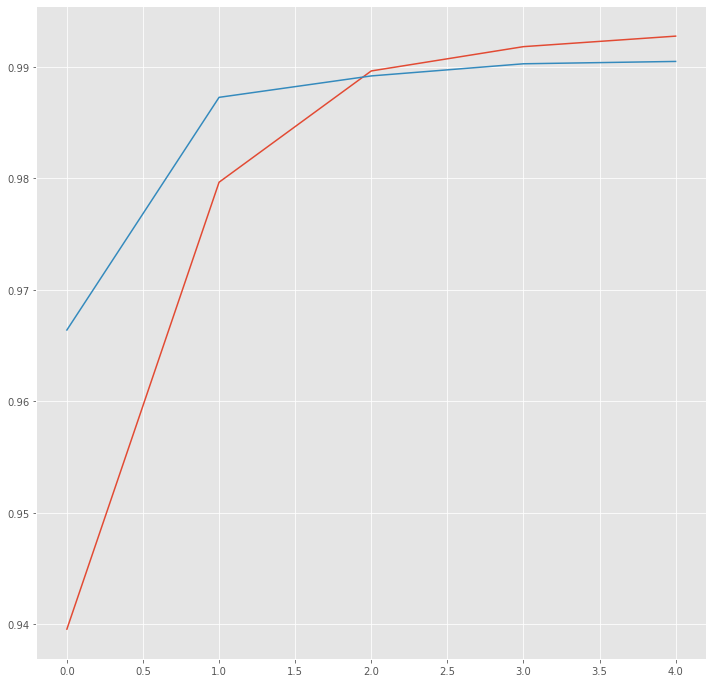

In [30]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["crf_viterbi_accuracy"])
plt.plot(hist["val_crf_viterbi_accuracy"])
plt.show()

In [31]:
!pip install seqeval

In [0]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

当模型的性能评估达到要求后，我们就可以用训练好的模型在新的数据上进行预测了。
predictions是预测返回的结果，数据格式与输出层的输出格式相同。

In [33]:
test_pred = model.predict(X_te, verbose=1)

4797/4797 [==============================] - 7s 1ms/step


In [0]:
idx2tag = {i:w for w,i in tag2idx.items()}
def pred2label(pred):
    out = []
    for pred_i in pred:
      out_i = []
      for p in pred_i:
        p_i = np.argmax(p)    #取索引
        out_i.append(idx2tag[p_i].replace("PAD","O"))   #取标签
      out.append(out_i)
    return out

In [0]:
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)

In [36]:
print("F1-score: {:.2%}".format(f1_score(test_labels, pred_labels)))

F1-score: 82.82%


In [37]:
print(classification_report(test_labels, pred_labels, digits=4))

           precision    recall  f1-score   support

      per     0.7799    0.7240    0.7509      1674
      org     0.7376    0.6905    0.7133      2097
      gpe     0.9718    0.9198    0.9451      1571
      geo     0.8413    0.8958    0.8677      3722
      tim     0.8812    0.8403    0.8603      2048
      eve     0.5000    0.1290    0.2051        31
      nat     0.7500    0.1579    0.2609        19
      art     0.0000    0.0000    0.0000        39

micro avg     0.8382    0.8184    0.8282     11201
macro avg     0.8343    0.8184    0.8249     11201



训练后的模型，我们需要对其性能进行评估，以此来确定训练效果是否达到了我们的预期。
evaluate方法的参数X,y与fit方法的数据类型是一样的，一般会选择用测试数据进行评估。

In [38]:
model.evaluate(X_te, np.array(y_te))

4797/4797 [==============================] - 8s 2ms/step


[0.012959391816795084, 0.9905651807785034]

In [0]:
i = 2020
p = model.predict(np.array([X_te[i]]))

In [40]:
p.shape

(1, 75, 17)

In [0]:
p = np.argmax(p, axis=-1)

In [42]:
p

array([[13,  3, 13, 13, 13, 13, 10, 13, 13, 10,  2,  7, 13, 13, 13, 13,
        10,  5, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]])

In [0]:
true = np.argmax(y_te[i], -1)

In [44]:
true

array([13,  3, 13, 13, 13, 13,  8, 13, 13, 10,  2,  7, 13, 13, 13, 13, 10,
        5, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13])

In [45]:
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_te[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))

Word           ||True ||Pred
paratroopers   : O     O
tails          : B-gpe B-gpe
Earnings       : O     O
surpasses      : O     O
Conakry        : O     O
Dollar-priced  : O     O
Massa          : B-org B-geo
8.30           : O     O
seeks          : O     O
treating       : B-geo B-geo
ceremony       : B-per B-per
29,799         : I-per I-per
sailors        : O     O
shopkeeper     : O     O
intervention   : O     O
2012           : O     O
Olympic        : B-geo B-geo
Politics       : B-tim B-tim
touchdowns     : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O     O
Mexican        : O